In [1]:
%matplotlib inline

In [2]:
# Load an FVCOM model output and plot a surface.
from PyFVCOM.read_results import FileReader
from PyFVCOM.plot import Plotter, Time
from PyFVCOM.tide_tools import make_water_column
from cmocean import cm
import matplotlib.pyplot as plt

fvcom = FileReader('sample.nc', dims={'time': [0, 200]}, variables=['zeta'])

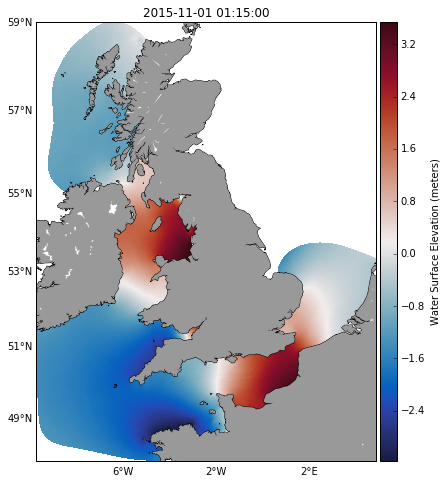

In [3]:
# Make a plot of the surface elevation.
plot = Plotter(fvcom, 
               figsize=(20, 20),
               res='i',
               tick_inc=(4, 2), 
               cb_label='{} ({})'.format(fvcom.atts.zeta.long_name,
                                         fvcom.atts.zeta.units),
               cmap=cm.balance)
plot.plot_field(fvcom.data.zeta[5, :])
plot.axes.set_title(fvcom.time.datetime[5].strftime('%Y-%m-%d %H:%M:%S'))

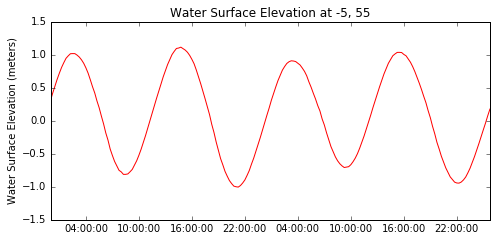

In [4]:
# Do a time series at a specific location.
gauge = (-5, 55)  # a sample (lon, lat) position
index = fvcom.closest_node(gauge)
time = Time(fvcom, figsize=(20, 9), title='{} at {}, {}'.format(fvcom.atts.zeta.long_name,
                                                                *gauge))
time.plot_line(fvcom.data.zeta[:, index], color='r')
time.axes.set_ylabel('{} ({})'.format(fvcom.atts.zeta.long_name,
                                      fvcom.atts.zeta.units))

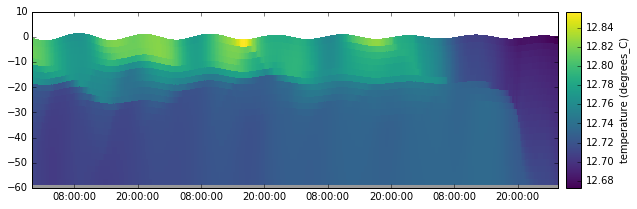

In [5]:
# Plot a depth-varying profile through a water column
fvcom = FileReader('sample.nc', variables=['temp', 'zeta'], dims={'time': [0, 400], 'node': [5000]})
time = Time(fvcom, figsize=(25, 8), cb_label='{} ({})'.format(fvcom.atts.temp.long_name,
                                                              fvcom.atts.temp.units))
z = make_water_column(fvcom.data.zeta, fvcom.grid.h, fvcom.grid.siglay)
# fill_seabed makes the part of the plot below the seabed grey. 
# We need to squeeze the data array since we've only extracted a single
# position.
time.plot_surface(z, np.squeeze(fvcom.data.temp), fill_seabed=True)
